In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle

# bikesDiscretizado1                   Base3
# bikesDiscretizado2                   Base4
# bikesDiscretizado1Normalizado        Base5
# bikesDiscretizado2Normalizado        Base6
# bikesDiscretizado1Normalizado25      Base7
# bikesDiscretizado1Normalizado50      Base8
# bikesDiscretizado2Normalizado25      Base9
# bikesDiscretizado2Normalizado50      Base10

baseUsada = 'B4'
arquivo = 'bikesDiscretizado2'
CaminhoArquivo = 'C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Mineração/BackupBases/' + arquivo +'.csv'
labels = 'qtd'
base = pd.read_csv(CaminhoArquivo, sep=';');

y = base['qtd']
X = base.drop('qtd', axis=1)

# Binarize the output
y_bin = label_binarize(y, classes=[1,2,3,4,5])
n_classes = y_bin.shape[1]

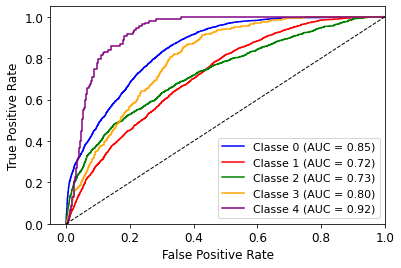

In [18]:
algoritmo = 'SVC'
pipe= Pipeline([('scaler', StandardScaler()), ('clf', SVC(probability=True))])
y_score = cross_val_predict(pipe, X, y, cv=10, method='predict_proba')

fpr = dict()
tpr = dict()
mean_fpr = np.linspace(0, 1, 100)
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='Classe {0} (AUC = {1:0.2f})' ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1.0)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
# plt.title('Curva ROC de dados multiclasse',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xticks(np.arange(0.0, 1.1, step=0.2), fontsize=12)
plt.yticks(np.arange(0.0, 1.1, step=0.2), fontsize=12)
plt.legend(prop={'size':11}, loc='lower right')
ende = 'C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/ROC/' + baseUsada + algoritmo
plt.savefig(ende,dpi=300);

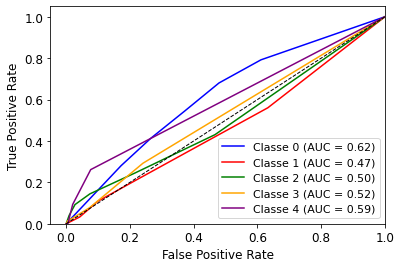

In [19]:
algoritmo = 'KNN'
pipe= Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])
y_score = cross_val_predict(pipe, X, y, cv=10, method='predict_proba')

fpr = dict()
tpr = dict()
mean_fpr = np.linspace(0, 1, 100)
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='Classe {0} (AUC = {1:0.2f})' ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1.0)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
# plt.title('Curva ROC de dados multiclasse',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xticks(np.arange(0.0, 1.1, step=0.2), fontsize=12)
plt.yticks(np.arange(0.0, 1.1, step=0.2), fontsize=12)
plt.legend(prop={'size':11}, loc='lower right')
ende = 'C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/ROC/' + baseUsada + algoritmo
plt.savefig(ende,dpi=300);

C:\Users\John\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\John\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\John\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\John\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\John\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

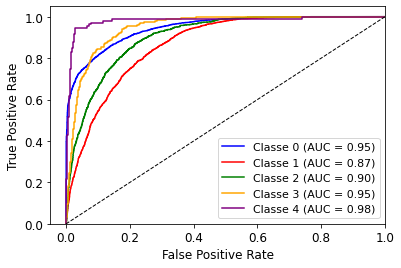

In [20]:
algoritmo = 'MLP'
pipe= Pipeline([('scaler', StandardScaler()), ('clf', MLPClassifier())])
y_score = cross_val_predict(pipe, X, y, cv=10, method='predict_proba')

fpr = dict()
tpr = dict()
mean_fpr = np.linspace(0, 1, 100)
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='Classe {0} (AUC = {1:0.2f})' ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1.0)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
# plt.title('Curva ROC de dados multiclasse',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xticks(np.arange(0.0, 1.1, step=0.2), fontsize=12)
plt.yticks(np.arange(0.0, 1.1, step=0.2), fontsize=12)
plt.legend(prop={'size':11}, loc='lower right')
ende = 'C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/ROC/' + baseUsada + algoritmo
plt.savefig(ende,dpi=300);

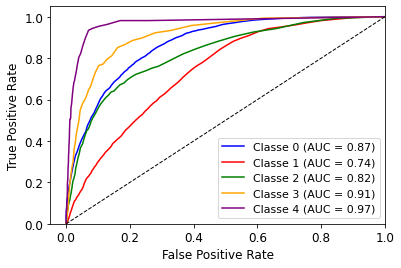

In [21]:
algoritmo = 'RFC'
pipe= Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier())])
y_score = cross_val_predict(pipe, X, y, cv=10, method='predict_proba')

fpr = dict()
tpr = dict()
mean_fpr = np.linspace(0, 1, 100)
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='Classe {0} (AUC = {1:0.2f})' ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1.0)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
# plt.title('Curva ROC de dados multiclasse',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xticks(np.arange(0.0, 1.1, step=0.2), fontsize=12)
plt.yticks(np.arange(0.0, 1.1, step=0.2), fontsize=12)
plt.legend(prop={'size':11}, loc='lower right')
ende = 'C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/ROC/' + baseUsada + algoritmo
plt.savefig(ende,dpi=300);

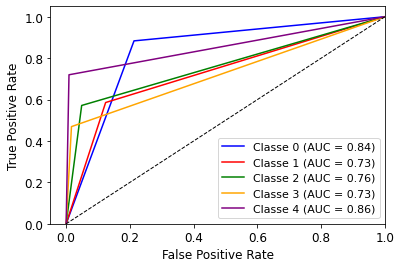

In [12]:
algoritmo = 'DT'
pipe= Pipeline([('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())])
y_score = cross_val_predict(pipe, X, y, cv=10, method='predict_proba')

fpr = dict()
tpr = dict()
mean_fpr = np.linspace(0, 1, 100)
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='Classe {0} (AUC = {1:0.2f})' ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1.0)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
# plt.title('Curva ROC de dados multiclasse',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xticks(np.arange(0.0, 1.1, step=0.2), fontsize=12)
plt.yticks(np.arange(0.0, 1.1, step=0.2), fontsize=12)
plt.legend(prop={'size':11}, loc='lower right')
ende = 'C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/ROC/' + baseUsada + algoritmo
plt.savefig(ende,dpi=300);

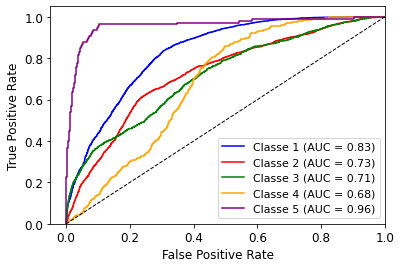

In [22]:

algoritmo = 'NB'
pipe= Pipeline([('scaler', StandardScaler()), ('clf', GaussianNB())])
# or
#clf = OneVsRestClassifier(LogisticRegression())
#pipe= Pipeline([('scaler', StandardScaler()), ('clf', clf)])
y_score = cross_val_predict(pipe, X, y, cv=10, method='predict_proba')

fpr = dict()
tpr = dict()
mean_fpr = np.linspace(0, 1, 100)
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='Classe {0} (AUC = {1:0.2f})' ''.format(i+1, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1.0)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
# plt.title('Curva ROC de dados multiclasse',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xticks(np.arange(0.0, 1.1, step=0.2), fontsize=12)
plt.yticks(np.arange(0.0, 1.1, step=0.2), fontsize=12)
plt.legend(prop={'size':11}, loc='lower right')
ende = 'C:/Users/John/Desktop/Mestrado/Dissertacao/ProjetoBikes/Experimentos/ROC/' + baseUsada + algoritmo
plt.savefig(ende,dpi=300);